<a href="https://colab.research.google.com/github/gaikwadadi/Traffic-Light-Detection-with-YOLOv8/blob/main/Fine_Tuning_YOLO_Pre_trained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fine-Tuning a Pretrained YOLOv8 Model on a Custom Dataset

Fine-tuning YOLOv8 on a custom dataset allows the model to specialize in detecting specific objects while leveraging the knowledge from the pretrained model.

###- Step 1: Install and Import Dependencies

###- Step 2: Prepare Your Dataset

  YOLOv8 requires your dataset to be in the following format:



```
dataset/
│── images/
│   ├── train/
│   ├── val/
│   ├── test/  # Optional
│── labels/
│   ├── train/
│   ├── val/
│   ├── test/  # Optional

```
Each image must have a corresponding label file (.txt format) in the labels/ directory. The label format should follow YOLO annotation rules:



```
<class_id> <x_center> <y_center> <width> <height>
```
- class_id → Index of object class (0, 1, 2, etc.).
- x_center and y_center → Coordinates of the center of the bounding box (normalized).
- width and height → Dimensions of the bounding box (normalized).


###- Step 3: Create data.yaml File


YOLOv8 needs a data.yaml file to define the dataset configuration.

###- Step 4: Train the YOLOv8 Model

fine-tune the pretrained YOLOv8 model (yolov8n.pt or another variant) on your custom dataset:


###- Step 5: Monitor Training Performance

During training, you’ll see metrics like loss, mAP, precision, recall, and F1-score.
After training is complete, you can evaluate the model:



```
model.val()
```
This will generate performance metrics and display results.

###- Step 6: Run Inference on New Images

Once training is done, test the model on new images:


### The Traffic Light Detection Dataset


We will train the YOLOv8 model using a traffic light detection dataset. The Small Traffic Light Dataset (S2TLD) by Thinklab. The collection of the images and annotations are provided in the download link within the notebook.


The dataset contains 4564 images and the annotations are present in XML format. The following images paint a clear picture of the varying scenarios in which the images have been collected.

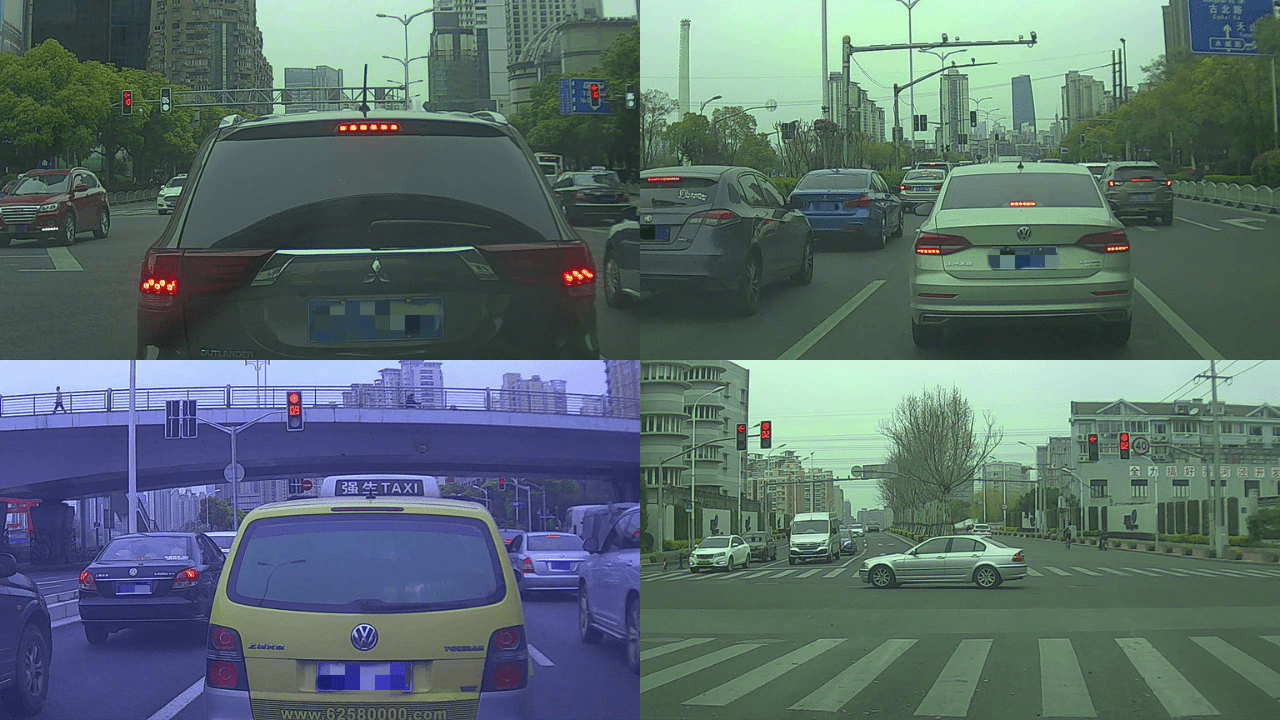

The dataset version that will be used contains four classes:

- red
- yellow
- green
- off

### Importing Required Libraries

In [ ]:
import os  # Helps in interfacing with the underlying operating system that Python is running on.
import xml.etree.ElementTree as ET  # Will assist in parsing XML files

import requests  # lets us send HTTP requests, essential for fetching online datasets
import zipfile   # extracting compressed files, useful if dealing with zipped datasets

from tqdm.auto import tqdm   # Enhances the code with progress bars, making lengthy processes user-friendly.

###Downloading the Dataset

In [ ]:
# Download dataset


# Download dataset.
def download_file(url, save_name):
    if not os.path.exists(save_name):
        print(f"Downloading file")
        file = requests.get(url, stream=True)
        total_size = int(file.headers.get('content-length', 0))
        block_size = 1024
        progress_bar = tqdm(
            total=total_size,
            unit='iB',
            unit_scale=True
        )
        with open(os.path.join(save_name), 'wb') as f:   # write binary mode
            for data in file.iter_content(block_size):
                progress_bar.update(len(data))
                f.write(data)
        progress_bar.close()
    else:
        print('File alrepady present')

download_file(
    'https://www.dropbox.com/scl/fi/suext2oyjxa0v4p78bj3o/S2TLD_720x1280.zip?rlkey=iequuynn54uib0uhsc7eqfci4&dl=1',
    'S2TLD_720x1280.zip'
)

  0%|          | 0.00/1.12G [00:00<?, ?iB/s]

### Unzip Dataset

The dataset will be extracted into the S2TLD_720x1280 directory.

In [ ]:
# Unzip the data file
def unzip(zip_file=None):
    try:
        with zipfile.ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all")
    except:
        print("Invalid file")

unzip('S2TLD_720x1280.zip')

Extracted all


###Observing Image

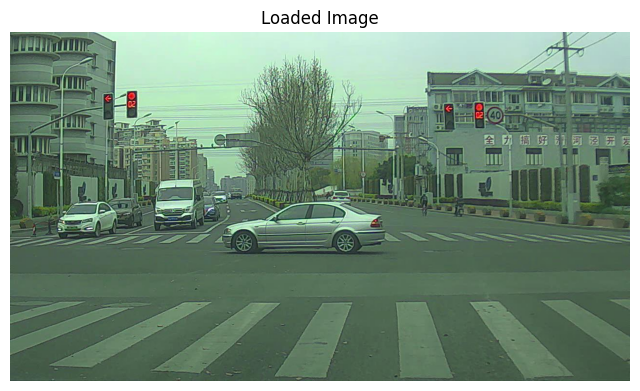

In [ ]:
image_path = '/content/S2TLD_720x1280/images/000000.jpg'

import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Display image
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis("off")  # Hide axes
plt.title("Loaded Image")
plt.show()


In [ ]:
# We have image of road traffic light
# In image we can see there, four leds are blinking in red color
# In data set for every image we have Xml file which contains all details and bounding box cordinates

###Observing the XML Files

In [ ]:
import xml.etree.ElementTree as ET

# Path to your XML file
xml_file = "/content/S2TLD_720x1280/annotations/000000.xml"

# Parse the XML file
tree = ET.parse(xml_file)
root = tree.getroot()

# Print the entire XML structure
ET.dump(root)
root.find("size/height").text


#pd.read_xml('/content/S2TLD_720x1280/annotations/000000.xml')


<annotation verified="yes">
	<folder>cam00</folder>
	<filename>000000.jpg</filename>
	<path>/home/zhaohuaqing/Documents/4_2/images/000000.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>1280</width>
		<height>720</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>red</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>190</xmin>
			<ymin>126</ymin>
			<xmax>217</xmax>
			<ymax>183</ymax>
		</bndbox>
	</object>
	<object>
		<name>red</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>241</xmin>
			<ymin>120</ymin>
			<xmax>265</xmax>
			<ymax>172</ymax>
		</bndbox>
	</object>
	<object>
		<name>red</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>894</xmin>
			<ymin>146</ymin>
			<xmax>922</xmax>
			<ymax>202</ymax>
		</bndbox>
	</object>
	<object>
		<name>re

'720'

In [ ]:
# After pasing xml file we can see the details for the first image
# Xml file contain details like height, width, dept i.e color image chanels
# Bounding box co-ordinates

In [ ]:
root.find('filename').text

'000000.jpg'

In [ ]:
root.find("object/name").text

'red'

In [ ]:
import xml.etree.ElementTree as ET

# Load XML file
xml_file = "/content/S2TLD_720x1280/annotations/000000.xml"  # Change this to your actual XML file
tree = ET.parse(xml_file)
root = tree.getroot()

# Extract image details
filename = root.find("filename").text
folder = root.find("folder").text
path = root.find("path").text

# Extract image size
width = int(root.find("size/width").text)
height = int(root.find("size/height").text)
depth = int(root.find("size/depth").text)

# Store bounding box details
objects = []
for obj in root.findall("object"):
    class_name = obj.find("name").text
    xmin = int(obj.find("bndbox/xmin").text)
    ymin = int(obj.find("bndbox/ymin").text)
    xmax = int(obj.find("bndbox/xmax").text)
    ymax = int(obj.find("bndbox/ymax").text)

    objects.append({
        "class": class_name,
        "xmin": xmin,
        "ymin": ymin,
        "xmax": xmax,
        "ymax": ymax
    })

# Print extracted data
print(f"Folder: {folder}")
print(f"Filename: {filename}")
print(f"Path: {path}")
print(f"Image Size: {width}x{height}, Depth: {depth}")
print("\n🟢 Detected Objects:")
for obj in objects:
    print(f" - Class: {obj['class']}, Bounding Box: ({obj['xmin']}, {obj['ymin']}) → ({obj['xmax']}, {obj['ymax']})")


Folder: cam00
Filename: 000000.jpg
Path: /home/zhaohuaqing/Documents/4_2/images/000000.jpg
Image Size: 1280x720, Depth: 3

🟢 Detected Objects:
 - Class: red, Bounding Box: (190, 126) → (217, 183)
 - Class: red, Bounding Box: (241, 120) → (265, 172)
 - Class: red, Bounding Box: (894, 146) → (922, 202)
 - Class: red, Bounding Box: (956, 145) → (983, 200)


### The Dataset Preparation

Let’s move on to one of the most important aspects of training any deep learning model – preparing the dataset.

We start with defining the class names and accessing all the image and annotation files.



In [ ]:
class_ids = [
    "red",
    "yellow",
    "green",
    "off",
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))

# { 0 : 'red', 1 : 'yellow'}

path_images ='/content/S2TLD_720x1280/images'
path_annot = '/content/S2TLD_720x1280/annotations'

# Get all XML file paths in path_annot and sort them
xml_files = sorted(
    [
        os.path.join(path_annot, file_name)
        for file_name in os.listdir(path_annot)
        if file_name.endswith(".xml")
    ]
)

# Get all JPEG image file paths in path_images and sort them
jpg_files = sorted(
    [
        os.path.join(path_images, file_name)
        for file_name in os.listdir(path_images)
        if file_name.endswith(".jpg")
    ]
)

The class_mapping dictionary provides an easy lookup from numerical IDs to their respective class names. All the image and annotation file paths are stored in the xml_files and jpg_files , respectively.

In [ ]:
class_mapping

{0: 'red', 1: 'yellow', 2: 'green', 3: 'off'}

Next is parsing the XML annotation files to store the labels and bounding box annotations needed for training.

In [ ]:
root

<Element 'annotation' at 0x7963a55563e0>

In [ ]:
def parse_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    image_name = root.find("filename").text
    image_path = os.path.join(path_images, image_name)

    boxes = []
    classes = []
    for obj in root.iter("object"):
        cls = obj.find("name").text
        classes.append(cls)

        bbox = obj.find("bndbox")
        xmin = float(bbox.find("xmin").text)
        ymin = float(bbox.find("ymin").text)
        xmax = float(bbox.find("xmax").text)
        ymax = float(bbox.find("ymax").text)
        boxes.append([xmin, ymin, xmax, ymax])

    class_ids = [
        list(class_mapping.keys())[list(class_mapping.values()).index(cls)]
        for cls in classes
    ]
    return image_path, boxes, class_ids


image_paths = []
bbox = []
classes = []
for xml_file in tqdm(xml_files):
    image_path, boxes, class_ids = parse_annotation(xml_file)
    image_paths.append(image_path)
    bbox.append(boxes)
    classes.append(class_ids)

  0%|          | 0/4564 [00:00<?, ?it/s]

In [ ]:
len(bbox)

4564

The parse_annotation(xml_file) function dives into each XML file, extracting the filename, object classes, and their respective bounding box coordinates. With the help of class_mapping, it converts class names to class IDs for ease of use.

### Resizing all the images into YOLO format i.e. 640*640

In [ ]:
'/content/S2TLD_720x1280/images'

'/content/S2TLD_720x1280/images'

In [ ]:
import cv2   #opencv  : we can resize the image
import os

# Define the target size for YOLOv8
TARGET_SIZE = (640, 640)  # YOLOv8 expects 640x640

# Folder to save resized images
output_folder = "resized_images"
os.makedirs(output_folder, exist_ok=True)

# Loop through all image paths and resize them
for image_path in image_paths:
    # Load the image
    image = cv2.imread(image_path)

    if image is None:
        print(f"❌ Error loading image: {image_path}")
        continue

    # Resize the image to 640x640
    resized_image = cv2.resize(image, TARGET_SIZE)

    # Get the filename and save the resized image
    filename = os.path.basename(image_path)
    output_path = os.path.join(output_folder, filename)
    cv2.imwrite(output_path, resized_image)

    print(f"✅ Resized and saved: {output_path}")

print("🎯 All images resized successfully!")


✅ Resized and saved: resized_images/000000.jpg
✅ Resized and saved: resized_images/000001.jpg
✅ Resized and saved: resized_images/000002.jpg
✅ Resized and saved: resized_images/000003.jpg
✅ Resized and saved: resized_images/000004.jpg
✅ Resized and saved: resized_images/000005.jpg
✅ Resized and saved: resized_images/000006.jpg
✅ Resized and saved: resized_images/000007.jpg
✅ Resized and saved: resized_images/000008.jpg
✅ Resized and saved: resized_images/000009.jpg
✅ Resized and saved: resized_images/000010.jpg
✅ Resized and saved: resized_images/000011.jpg
✅ Resized and saved: resized_images/000012.jpg
✅ Resized and saved: resized_images/000013.jpg
✅ Resized and saved: resized_images/000014.jpg
✅ Resized and saved: resized_images/000015.jpg
✅ Resized and saved: resized_images/000016.jpg
✅ Resized and saved: resized_images/000017.jpg
✅ Resized and saved: resized_images/000018.jpg
✅ Resized and saved: resized_images/000019.jpg
✅ Resized and saved: resized_images/000020.jpg
✅ Resized and

### Resizing all the bounding boxes into YOLO format

In [ ]:
import os
import xml.etree.ElementTree as ET

# Define paths
xml_folder = "/content/S2TLD_720x1280/annotations"
output_folder = "path_to_resized_xmls"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

target_size = 640  # YOLOv8 standard size

for file in os.listdir(xml_folder):
    if file.endswith(".xml"):
        xml_path = os.path.join(xml_folder, file)
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Get original image size
        size = root.find("size")
        original_width = int(size.find("width").text)
        original_height = int(size.find("height").text)

        # Compute scaling factors
        scale_x = target_size / original_width
        scale_y = target_size / original_height

        # Resize bounding boxes
        for obj in root.findall("object"):
            bndbox = obj.find("bndbox")
            xmin = int(float(bndbox.find("xmin").text) * scale_x)
            ymin = int(float(bndbox.find("ymin").text) * scale_y)
            xmax = int(float(bndbox.find("xmax").text) * scale_x)
            ymax = int(float(bndbox.find("ymax").text) * scale_y)

            # Update XML with new bounding box values
            bndbox.find("xmin").text = str(xmin)
            bndbox.find("ymin").text = str(ymin)
            bndbox.find("xmax").text = str(xmax)
            bndbox.find("ymax").text = str(ymax)

        # Save updated XML
        output_path = os.path.join(output_folder, file)
        tree.write(output_path)

print("Bounding boxes resized successfully!")


Bounding boxes resized successfully!


In [ ]:
path_resized = '/content/path_to_resized_xmls'

# Get all XML file paths in path_annot and sort them
resized_xml_files = sorted(
    [
        os.path.join(path_resized, file_name)
        for file_name in os.listdir(path_resized)
        if file_name.endswith(".xml")
    ]
)

In [ ]:
resized_image_paths = []
resized_bbox = []
classes_ = []
for resized_xml_file in tqdm(resized_xml_files):
    image_path, boxes, class_ids = parse_annotation(resized_xml_file)
    resized_image_paths.append(image_path)
    resized_bbox.append(boxes)
    classes_.append(class_ids)

  0%|          | 0/4564 [00:00<?, ?it/s]

### Convert XML to YOLO Format

In YOLO format, each annotation is stored in a .txt file with the following structure:




```
<class_id> <x_center> <y_center> <width> <height>
```

Where:

- class_id: The numeric label of the object (e.g., 0 for "car", 1 for "person").
- x_center: Normalized center x-coordinate of the bounding box (divided by image width).
- y_center: Normalized center y-coordinate (divided by image height).
- width: Normalized width of the bounding box.
- height: Normalized height of the bounding box.

All values are relative to the image size (640×640) and should be between 0 and 1.

In [ ]:
import os
import xml.etree.ElementTree as ET

# Define paths
xml_folder = '/content/path_to_resized_xmls'  # Folder containing resized XML annotations
output_folder = "path_to_yolo_labels"  # Folder where YOLO txt files will be saved
classes = ["red",
    "yellow",
    "green",
    "off"]  # Update this with your class names

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for file in os.listdir(xml_folder):
    if file.endswith(".xml"):
        xml_path = os.path.join(xml_folder, file)
        tree = ET.parse(xml_path)
        root = tree.getroot()

        # Get image size (assumed 640x640 after resizing)
        img_width = 640
        img_height = 640

        yolo_data = []

        for obj in root.findall("object"):
            class_name = obj.find("name").text
            if class_name not in classes:
                continue
            class_id = classes.index(class_name)

            bndbox = obj.find("bndbox")
            xmin = int(bndbox.find("xmin").text)
            ymin = int(bndbox.find("ymin").text)
            xmax = int(bndbox.find("xmax").text)
            ymax = int(bndbox.find("ymax").text)

            # Convert to YOLO format (normalize values)
            x_center = ((xmin + xmax) / 2) / img_width
            y_center = ((ymin + ymax) / 2) / img_height
            bbox_width = (xmax - xmin) / img_width
            bbox_height = (ymax - ymin) / img_height

            yolo_data.append(f"{class_id} {x_center} {y_center} {bbox_width} {bbox_height}")

        # Save to .txt file
        txt_filename = os.path.join(output_folder, file.replace(".xml", ".txt"))
        with open(txt_filename, "w") as f:
            f.write("\n".join(yolo_data))

print("XML to YOLO format conversion completed!")


XML to YOLO format conversion completed!


In [ ]:
with open('/content/path_to_yolo_labels/000000.txt', "r") as file:
            print(file.read())

# 640*640
# bounding box scale acc to new shape

# we normalize the values of height /width/x_centre/y_centre
# minmaxscalr : normalization : 0-1

0 0.15859375 0.2140625 0.0203125 0.078125
0 0.196875 0.2015625 0.01875 0.071875
0 0.709375 0.240625 0.021875 0.078125
0 0.75703125 0.23828125 0.0203125 0.0765625


### Observing tXt files

In [ ]:
import os

folder_path = '/content/path_to_yolo_labels'

for file_name in os.listdir(folder_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(folder_path, file_name)
        print(f"Contents of {file_name}:\n")
        with open(file_path, "r") as file:
            print(file.read())
        print("=" * 50)  # Separator between files


Contents of 000346.txt:

2 0.39296875 0.76328125 0.0265625 0.1015625
Contents of 003524.txt:

2 0.36953125 0.253125 0.0140625 0.05625
2 0.525 0.25 0.015625 0.053125
Contents of 001316.txt:

2 0.30078125 0.24296875 0.0171875 0.0671875
2 0.60390625 0.2046875 0.0171875 0.071875
Contents of 003079.txt:

0 0.28359375 0.1640625 0.0203125 0.090625
0 0.5390625 0.140625 0.01875 0.090625
Contents of 000731.txt:

2 0.525 0.76171875 0.021875 0.0984375
2 0.55234375 0.75703125 0.0265625 0.0953125
Contents of 003874.txt:

0 0.684375 0.11015625 0.015625 0.0703125
0 0.7265625 0.1046875 0.015625 0.071875
Contents of 003964.txt:

2 0.48046875 0.1296875 0.0203125 0.084375
2 0.57109375 0.1125 0.0203125 0.084375
Contents of 000492.txt:

0 0.31796875 0.89453125 0.0171875 0.0703125
Contents of 003499.txt:

0 0.33046875 0.24296875 0.0109375 0.0515625
0 0.5125 0.22109375 0.0125 0.0546875
Contents of 000022.txt:

2 0.67421875 0.265625 0.0171875 0.08125
2 0.69375 0.26640625 0.021875 0.0828125
Contents of 001422.t

In [ ]:
# total 4564 images with there respective .txt file

# train
# test
# validation

### Defining the Dataset struture




```
dataset/
│── images/
│   ├── train/
│   ├── val/
│   ├── test/  # Optional
│── labels/
│   ├── train/
│   ├── val/
│   ├── test/  # Optional

```




In [ ]:
import os

# Define the dataset structure
base_dir = "/content/dataset"
folders = [
    "images/train", "images/val", "images/test",
    "labels/train", "labels/val", "labels/test"
]

# Create folders if they don’t exist
for folder in folders:
    os.makedirs(os.path.join(base_dir, folder), exist_ok=True)

print("Folders created successfully!")


Folders created successfully!


In [ ]:
import shutil
import random

# Define paths
image_source = "/content/resized_images"  # Folder where all images are currently stored
label_source = "/content/path_to_yolo_labels"  # Folder where all labels are currently stored

# Get all image filenames
image_files = [f for f in os.listdir(image_source) if f.endswith(".jpg")]

# Shuffle images for random split
random.shuffle(image_files)

# Define split ratios
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

# Calculate split sizes
total_images = len(image_files)
train_count = int(total_images * train_ratio)
val_count = int(total_images * val_ratio)

# Split dataset
train_images = image_files[:train_count]
val_images = image_files[train_count:train_count + val_count]
test_images = image_files[train_count + val_count:]

# Function to move files
def move_files(file_list, dest_folder, label_dest_folder):
    for file_name in file_list:
        # Move image
        shutil.move(os.path.join(image_source, file_name), os.path.join(dest_folder, file_name))

        # Move corresponding label file (change .jpg or .png to .txt)
        label_file = file_name.replace(".jpg", ".txt")
        if os.path.exists(os.path.join(label_source, label_file)):
            shutil.move(os.path.join(label_source, label_file), os.path.join(label_dest_folder, label_file))

# Move files into train, val, and test folders
move_files(train_images, base_dir + "/images/train", base_dir + "/labels/train")
move_files(val_images, base_dir + "/images/val", base_dir + "/labels/val")
move_files(test_images, base_dir + "/images/test", base_dir + "/labels/test")

print("Dataset successfully organized into train, val, and test sets!")


Dataset successfully organized into train, val, and test sets!


### Creating YAML file

**What is a YAML File?**

YAML (Yet Another Markup Language) is a human-readable configuration format used to store structured data. It is widely used in deep learning and computer vision for dataset configuration.

**Importance of YAML in Fine-Tuning YOLOv8**

When fine-tuning YOLOv8, a data.yaml file is required to specify:  Path to the dataset (training, validation, and test images).
-  Number of classes (how many object categories the model should detect).
-  Class names (labels for object categories).

YOLOv8 reads this file during training to understand how to use your dataset.

In [ ]:
data_yaml = """
path: /content/dataset
train: images/train
val: images/val
test: images/test  # Optional

nc: 4  # number of classes in  dataset
names: ["red",
    "yellow",
    "green",
    "off"]  # class names
"""

with open("/content/dataset/data.yaml", "w") as file:
    file.write(data_yaml)

print("data.yaml file created successfully!")


data.yaml file created successfully!


### Model training begins

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 30.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

### YOLOv8 Variant in ultralytics

- yolov8n.pt → Fast, small model (good for real-time detection).
- yolov8s.pt → Small but slightly more accurate.
- yolov8m.pt → Medium-sized model (balanced).
- yolov8l.pt → Large model (best for accuracy but slow).
- yolov8x.pt → Extra-large model (best accuracy, high computation cost).

In [ ]:
# Ultralytics in which YOLO varients are stored

# YOLO v8

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 98.9MB/s]


In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 86.4MB/s]


In [ ]:
model.train(data="/content/dataset/data.yaml", epochs=50, batch=32, imgsz=640)

Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=T

100%|██████████| 755k/755k [00:00<00:00, 26.8MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,628 parameters, 3,011,612 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 56.0±17.9 MB/s, size: 134.5 KB)


train: Scanning /content/dataset/labels/train... 3651 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3651/3651 [00:05<00:00, 610.53it/s]

train: New cache created: /content/dataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 30.8±13.8 MB/s, size: 153.4 KB)


val: Scanning /content/dataset/labels/val... 456 images, 0 backgrounds, 0 corrupt: 100%|██████████| 456/456 [00:00<00:00, 586.87it/s]

val: New cache created: /content/dataset/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.21G      1.598      2.962     0.9642          4        640: 100%|██████████| 115/115 [01:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.24it/s]

                   all        456       1178      0.717       0.36      0.451      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.98G      1.459      1.467     0.9396          5        640: 100%|██████████| 115/115 [01:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


                   all        456       1178      0.702      0.563      0.633      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.01G      1.433      1.153     0.9337         13        640: 100%|██████████| 115/115 [01:04<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]


                   all        456       1178      0.767      0.742       0.75      0.444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.02G      1.422     0.9904     0.9349          8        640: 100%|██████████| 115/115 [01:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.46it/s]

                   all        456       1178      0.818      0.639      0.775      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.04G      1.368     0.8799      0.926         13        640: 100%|██████████| 115/115 [01:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]

                   all        456       1178       0.83      0.793      0.849      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.05G      1.364     0.8353     0.9174          5        640: 100%|██████████| 115/115 [01:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.83it/s]

                   all        456       1178      0.819      0.808       0.87      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.08G      1.341     0.8066     0.9173         10        640: 100%|██████████| 115/115 [01:01<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]

                   all        456       1178      0.923      0.822      0.897      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.08G      1.342     0.7752     0.9144          8        640: 100%|██████████| 115/115 [01:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.82it/s]

                   all        456       1178      0.826      0.712       0.82      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.11G      1.298     0.7484     0.9149         12        640: 100%|██████████| 115/115 [01:00<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.88it/s]

                   all        456       1178      0.887      0.792      0.855      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.12G        1.3     0.7347      0.912          9        640: 100%|██████████| 115/115 [01:00<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]


                   all        456       1178      0.912      0.793      0.861      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.14G      1.295     0.7108     0.9106          8        640: 100%|██████████| 115/115 [01:00<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]


                   all        456       1178      0.742       0.82      0.818      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.15G      1.279      0.707     0.8999          4        640: 100%|██████████| 115/115 [01:00<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.94it/s]

                   all        456       1178      0.895      0.759      0.874      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.18G      1.276     0.7016     0.8995         12        640: 100%|██████████| 115/115 [01:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]

                   all        456       1178       0.78      0.857       0.91      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.19G       1.27     0.6892     0.8998         10        640: 100%|██████████| 115/115 [01:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.85it/s]

                   all        456       1178      0.911      0.855      0.911       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.21G      1.252     0.6729      0.902          5        640: 100%|██████████| 115/115 [01:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]

                   all        456       1178      0.927      0.823      0.919      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.22G      1.253     0.6749     0.8968         14        640: 100%|██████████| 115/115 [01:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.99it/s]

                   all        456       1178      0.919      0.875      0.918      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.25G      1.234      0.668      0.899          9        640: 100%|██████████| 115/115 [01:01<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]

                   all        456       1178      0.947      0.851       0.94      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.25G      1.239     0.6527     0.8992         20        640: 100%|██████████| 115/115 [01:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


                   all        456       1178      0.919      0.851      0.924      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.28G      1.228     0.6527     0.8921         11        640: 100%|██████████| 115/115 [00:59<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.78it/s]

                   all        456       1178      0.959      0.867      0.937      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.29G      1.221     0.6389      0.892         12        640: 100%|██████████| 115/115 [01:00<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.93it/s]

                   all        456       1178      0.951      0.878      0.945       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.31G      1.213     0.6327     0.8951          6        640: 100%|██████████| 115/115 [00:59<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]


                   all        456       1178      0.948       0.87      0.932      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.32G      1.202      0.621     0.8891         16        640: 100%|██████████| 115/115 [00:59<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.63it/s]


                   all        456       1178      0.938      0.863      0.919      0.576

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.35G      1.196     0.6224     0.8888          6        640: 100%|██████████| 115/115 [01:00<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]

                   all        456       1178      0.943      0.841      0.934      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.36G      1.197      0.616     0.8861          7        640: 100%|██████████| 115/115 [00:59<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]

                   all        456       1178      0.939      0.873      0.941      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.38G      1.204     0.6092     0.8872         11        640: 100%|██████████| 115/115 [00:59<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]

                   all        456       1178      0.931      0.906      0.952      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.39G      1.197     0.6043     0.8874          5        640: 100%|██████████| 115/115 [00:59<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.53it/s]

                   all        456       1178      0.928      0.892      0.932       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.42G      1.174     0.5879     0.8903         17        640: 100%|██████████| 115/115 [00:59<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]

                   all        456       1178      0.922      0.903      0.947      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.43G      1.197     0.6016     0.8825         11        640: 100%|██████████| 115/115 [00:59<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.50it/s]

                   all        456       1178      0.942      0.862      0.934      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.46G      1.183     0.5936     0.8805         12        640: 100%|██████████| 115/115 [01:00<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]

                   all        456       1178      0.932      0.887      0.941        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.46G      1.172     0.5912      0.882          7        640: 100%|██████████| 115/115 [00:59<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.49it/s]

                   all        456       1178      0.939      0.904      0.945      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.49G      1.174     0.5891     0.8808          9        640: 100%|██████████| 115/115 [00:59<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.53it/s]

                   all        456       1178      0.946      0.884      0.963      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       5.5G      1.165     0.5893     0.8843         10        640: 100%|██████████| 115/115 [00:59<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.54it/s]

                   all        456       1178      0.937      0.874      0.934      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.52G      1.161     0.5833     0.8814         14        640: 100%|██████████| 115/115 [00:59<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]

                   all        456       1178      0.923      0.895      0.933      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.53G      1.165     0.5692     0.8827         12        640: 100%|██████████| 115/115 [00:59<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.55it/s]

                   all        456       1178      0.966      0.873      0.934      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.55G      1.152     0.5635     0.8811          9        640: 100%|██████████| 115/115 [00:59<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.53it/s]

                   all        456       1178       0.93      0.903      0.941      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.56G      1.154     0.5615     0.8791          8        640: 100%|██████████| 115/115 [00:59<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.48it/s]

                   all        456       1178       0.95      0.882      0.943       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.59G      1.149     0.5581     0.8821         17        640: 100%|██████████| 115/115 [00:59<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.58it/s]

                   all        456       1178      0.916      0.893      0.932      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       5.6G      1.143     0.5544     0.8745          9        640: 100%|██████████| 115/115 [00:59<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]

                   all        456       1178      0.931      0.915      0.945      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.62G      1.121     0.5437     0.8744         10        640: 100%|██████████| 115/115 [00:59<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.51it/s]

                   all        456       1178      0.915      0.935      0.953       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.63G      1.129     0.5438     0.8744          6        640: 100%|██████████| 115/115 [00:59<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.57it/s]

                   all        456       1178      0.926      0.912      0.934      0.603


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.66G      1.121     0.5408     0.8848          8        640: 100%|██████████| 115/115 [00:59<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.62it/s]

                   all        456       1178      0.932      0.895      0.951      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.66G      1.115     0.5306     0.8839          7        640: 100%|██████████| 115/115 [00:57<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.53it/s]

                   all        456       1178      0.929      0.917      0.961      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.69G      1.111      0.526     0.8783          6        640: 100%|██████████| 115/115 [00:57<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


                   all        456       1178      0.943      0.916      0.955      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       5.7G        1.1     0.5173     0.8838          4        640: 100%|██████████| 115/115 [00:57<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.97it/s]

                   all        456       1178      0.931      0.918      0.953      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.72G      1.099     0.5182     0.8856          6        640: 100%|██████████| 115/115 [00:57<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.90it/s]

                   all        456       1178       0.93      0.923      0.956      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.73G      1.098     0.5077     0.8819         13        640: 100%|██████████| 115/115 [00:57<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:05<00:00,  1.52it/s]

                   all        456       1178      0.948      0.907      0.956      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.76G      1.079     0.5042     0.8767          6        640: 100%|██████████| 115/115 [00:56<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.77it/s]


                   all        456       1178      0.932      0.922      0.956      0.618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.77G      1.085     0.5025     0.8776          5        640: 100%|██████████| 115/115 [00:57<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.89it/s]

                   all        456       1178      0.926      0.896      0.948      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.79G      1.077      0.501     0.8723          8        640: 100%|██████████| 115/115 [00:57<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]

                   all        456       1178      0.934      0.894      0.942      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       5.8G      1.072     0.4991     0.8751          4        640: 100%|██████████| 115/115 [00:57<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]

                   all        456       1178      0.915      0.917      0.958      0.623



50 epochs completed in 0.910 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.31it/s]


                   all        456       1178      0.929      0.917      0.961      0.636
                   red        294        662      0.961      0.961      0.987       0.68
                yellow         11         22      0.854      0.818      0.908      0.572
                 green        226        449      0.926      0.954      0.975      0.647
                   off         30         45      0.974      0.933      0.972      0.646
Speed: 0.3ms preprocess, 2.3ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7960d5c7bd90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
model.val()

Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1851.5±1034.5 MB/s, size: 132.7 KB)


val: Scanning /content/dataset/labels/val.cache... 456 images, 0 backgrounds, 0 corrupt: 100%|██████████| 456/456 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:06<00:00,  2.39it/s]


                   all        456       1178      0.928      0.916      0.961      0.631
                   red        294        662      0.959       0.96      0.987      0.681
                yellow         11         22      0.853      0.818      0.908      0.574
                 green        226        449      0.926      0.954      0.977      0.645
                   off         30         45      0.974      0.933      0.973      0.624
Speed: 2.5ms preprocess, 3.8ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79623c664dd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
model.predict('/content/Traffic3.jpeg', save=True, conf=0.2)


image 1/1 /content/Traffic3.jpeg: 640x480 (no detections), 36.6ms
Speed: 2.9ms preprocess, 36.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/train3


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'red', 1: 'yellow', 2: 'green', 3: 'off'}
 obb: None
 orig_img: array([[[ 19,  25,  44],
         [ 20,  26,  45],
         [ 20,  26,  45],
         ...,
         [ 45,  42,  44],
         [ 45,  42,  44],
         [ 45,  42,  44]],
 
        [[ 19,  25,  44],
         [ 20,  26,  45],
         [ 20,  26,  45],
         ...,
         [ 45,  42,  44],
         [ 45,  42,  44],
         [ 45,  42,  44]],
 
        [[ 20,  26,  45],
         [ 20,  26,  45],
         [ 21,  27,  46],
         ...,
         [ 45,  42,  44],
         [ 45,  42,  44],
         [ 45,  42,  44]],
 
        ...,
 
        [[134, 150, 143],
         [134, 150, 143],
         [135, 151, 144],
         ...,
         [133, 145, 145],
         [128, 142, 141],
         [129, 143, 142]],
 
        [[136, 152, 145],
         [137, 153, 146],
         [137, 153, 146],


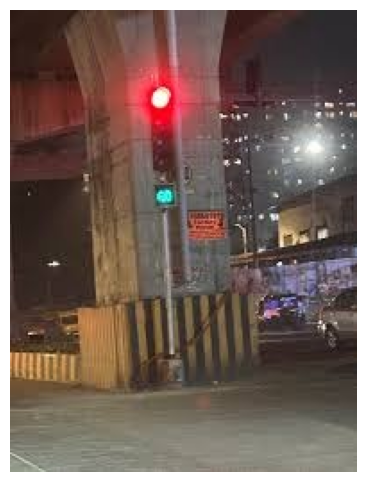

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# Path to the saved prediction image
image_path = "/content/runs/detect/train3/Traffic3.jpg"  # Change filename accordingly

# Check if the file exists
if os.path.exists(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

    # Display the image
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.axis("off")  # Hide axes
    plt.show()
else:
    print(f"File not found: {image_path}")


In [ ]:
# import cv2

In [ ]:
# video_path = "/content/Trffic signal.mp4"

# # Open video file
# cap = cv2.VideoCapture(video_path)

# # Get video properties
# fps = int(cap.get(cv2.CAP_PROP_FPS))

In [ ]:
# from ultralytics import YOLO
# import cv2

# # Load the trained YOLOv8 model
# model = YOLO("/content/runs/detect/train/weights/best.pt")  # Path to your trained model

# # Path to input video
# video_path = "/content/Trffic signal.mp4"

# # Open video file
# cap = cv2.VideoCapture(video_path)

# # Get video properties
# fps = int(cap.get(cv2.CAP_PROP_FPS))  # Frames per second
# width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
# height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# # Define the output video writer
# fourcc = cv2.VideoWriter_fourcc(*"mp4v")
# out = cv2.VideoWriter("/content/output_video.mp4", fourcc, fps, (width, height))

# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break

#     # Run YOLOv8 inference on the frame
#     results = model.predict(frame, conf=0.3)   # yolo n*n grid probality of having object is high

#     # Plot the results on the frame
#     annotated_frame = results[0].plot()

#     # Write the frame with detections to output video
#     out.write(annotated_frame)

# # Release resources
# cap.release()       # Closes the input video file.
# out.release()    # Saves and finalizes the output video.
# cv2.destroyAllWindows()   # Closes all OpenCV windows
